In [43]:
from tensorflow.keras import datasets
from PIL import Image
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
from keras.backend import set_session as K
from sklearn.model_selection import cross_val_score
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np
import glob

In [11]:
img_url = './Animal Classification/Training Data' # 트레인데이터 경로
categories = ['Cat','Cow','Dog','Elephant','Panda'] # 동물 종류
classes = len(categories)                           # 클래스 개수

image_w = 64                     
image_h = 64

pixel = image_h * image_w * 3

X = []
Y = []

for i, l in enumerate(categories):
    label = [0 for i in range(classes)]
    label[i] = 1
    
    image_url = img_url + "/" + l
    files = glob.glob(image_url+"/*.jpg")
    print(l, " 파일 길이 : ", len(files))
    for a,b in enumerate(files):
        img = Image.open(b)
        img = img.convert("RGB")
        img = img.resize((image_w, image_h))
        data = np.asarray(img)
        
        X.append(data)
        Y.append(label)
        
X = np.array(X)
Y = np.array(Y)

Cat  파일 길이 :  1500
Cow  파일 길이 :  1500
Dog  파일 길이 :  1500
Elephant  파일 길이 :  1500
Panda  파일 길이 :  1500


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,Y)

xy = (X_train, X_test, y_train, y_test)
np.save("./image_data.npy", xy) # 데이터를 .npy 로 저장 이걸가지고서 모델 학습

C:\Users\KOREAIT\anaconda3\envs\py39tf2\lib\site-packages\numpy\lib\npyio.py:501: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


In [13]:
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True

X_train, X_test, y_train, y_test = np.load('./image_data.npy',allow_pickle=True)
print(X_train.shape)
print(X_train.shape[0])

(5625, 64, 64, 3)
5625


In [14]:
#일반화
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

In [17]:


model = Sequential()
model.add(Conv2D(32, (3,3), padding="same", input_shape=X_train.shape[1:], activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(256, (3,3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
    
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_dir = './model'
    
if not os.path.exists(model_dir):
    os.mkdir(model_dir)
    
model_path = model_dir + '/multi_img_classification.model'
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 256)       73984     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 256)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 65536)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4194368   
_________________________________________________________________
dense_5 (Dense)              (None, 128)              

In [29]:
history = model.fit(X_train, y_train, 
                    batch_size=32, 
                    epochs=50, 
                    validation_data=(X_test, y_test))

Epoch 1/50
176/176 [==============================] - 17s 51ms/step - loss: 1.2803 - accuracy: 0.4565 - val_loss: 1.0311 - val_accuracy: 0.6112
Epoch 2/50
176/176 [==============================] - 6s 34ms/step - loss: 0.8991 - accuracy: 0.6606 - val_loss: 0.9203 - val_accuracy: 0.6453
Epoch 3/50
176/176 [==============================] - 6s 34ms/step - loss: 0.7111 - accuracy: 0.7371 - val_loss: 0.8655 - val_accuracy: 0.6875
Epoch 4/50
176/176 [==============================] - 6s 34ms/step - loss: 0.5386 - accuracy: 0.8069 - val_loss: 0.8345 - val_accuracy: 0.6960
Epoch 5/50
176/176 [==============================] - 6s 34ms/step - loss: 0.3427 - accuracy: 0.8816 - val_loss: 1.0245 - val_accuracy: 0.6773
Epoch 6/50
176/176 [==============================] - 6s 35ms/step - loss: 0.2094 - accuracy: 0.9260 - val_loss: 1.2047 - val_accuracy: 0.6992
Epoch 7/50
176/176 [==============================] - 6s 34ms/step - loss: 0.1305 - accuracy: 0.9525 - val_loss: 1.3931 - val_accuracy: 0.681

In [31]:
print("정확도 : %.4f" % (model.evaluate(X_test, y_test)[1]))

59/59 [==============================] - 1s 15ms/step - loss: 2.8077 - accuracy: 0.6939
정확도 : 0.6939


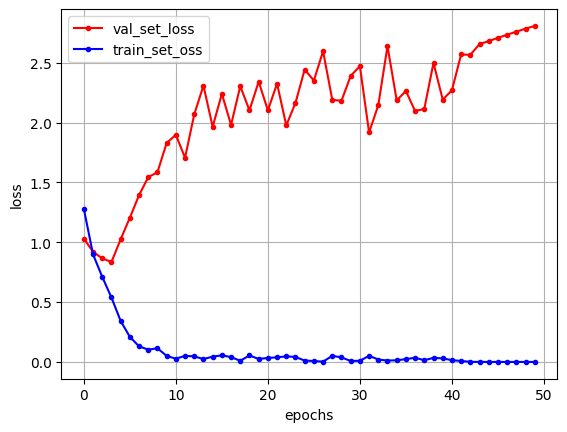

In [32]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='val_set_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train_set_oss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

In [41]:
from PIL import Image
import os, glob, numpy as np
from keras.models import load_model

caltech_dir = "./Animal Classification/Testing Data/TestImage"
image_w = 64
image_h = 64

pixels = image_h * image_w * 3

X = []
filenames = []
files = glob.glob(caltech_dir+"/*.*")
for i, f in enumerate(files):
    img = Image.open(f)
    img = img.convert("RGB")
    img = img.resize((image_w, image_h))
    data = np.asarray(img)
    filenames.append(f)
    X.append(data)

X = np.array(X)

prediction = model.predict(X)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
cnt = 0

for i in prediction:
    pre_ans = i.argmax()  # 예측 레이블
    print(i)
    print(pre_ans)
    pre_ans_str = ''
    if pre_ans == 0: pre_ans_str = "고양이"
    elif pre_ans == 1: pre_ans_str = "소"
    elif pre_ans == 2: pre_ans_str = "강아지"
    elif pre_ans == 3: pre_ans_str = '코끼리'
    else: pre_ans_str = "판다"
    if i[0] >= 0.8 : print("해당 "+filenames[cnt].split("\\")[1]+"이미지는 "+pre_ans_str+"로 추정됩니다.")
    if i[1] >= 0.8: print("해당 "+filenames[cnt].split("\\")[1]+"이미지는 "+pre_ans_str+"으로 추정됩니다.")
    if i[2] >= 0.8: print("해당 "+filenames[cnt].split("\\")[1]+"이미지는 "+pre_ans_str+"로 추정됩니다.")
    if i[3] >= 0.8: print("해당 "+filenames[cnt].split("\\")[1]+"이미지는 "+pre_ans_str+"로 추정됩니다.")
    if i[4] >= 0.8: print("해당 "+filenames[cnt].split("\\")[1]+"이미지는 "+pre_ans_str+"로 추정됩니다.")
    cnt += 1
    # print(i.argmax()) #얘가 레이블 [1. 0. 0.] 이런식으로 되어 있는 것을 숫자로 바꿔주는 것.
    # 즉 얘랑, 나중에 카테고리 데이터 불러와서 카테고리랑 비교를 해서 같으면 맞는거고, 아니면 틀린거로 취급하면 된다.

[0.000 1.000 0.000 0.000 0.000]
1
해당 cat-test (1).jpeg이미지는 소으로 추정됩니다.
[0.000 0.000 0.000 0.000 1.000]
4
해당 cat-test (2).jpeg이미지는 판다로 추정됩니다.
[1.000 0.000 0.000 0.000 0.000]
0
해당 cat-test (3).jpeg이미지는 고양이로 추정됩니다.
[0.000 1.000 0.000 0.000 0.000]
1
해당 cat-test (4).jpeg이미지는 소으로 추정됩니다.
[0.000 1.000 0.000 0.000 0.000]
1
해당 Cow-Test (1).jpeg이미지는 소으로 추정됩니다.
[0.000 1.000 0.000 0.000 0.000]
1
해당 Cow-Test (2).jpeg이미지는 소으로 추정됩니다.
[0.000 0.000 0.000 0.000 1.000]
4
해당 Cow-Test (3).jpeg이미지는 판다로 추정됩니다.
[0.000 0.000 0.000 0.000 1.000]
4
해당 Cow-Test (6).jpeg이미지는 판다로 추정됩니다.
[0.000 0.000 0.000 0.000 1.000]
4
해당 Dog-Test (1).jpeg이미지는 판다로 추정됩니다.
[0.000 0.000 1.000 0.000 0.000]
2
해당 Dog-Test (1).jpg이미지는 강아지로 추정됩니다.
[1.000 0.000 0.000 0.000 0.000]
0
해당 Dog-Test (2).jpeg이미지는 고양이로 추정됩니다.
[0.000 1.000 0.000 0.000 0.000]
1
해당 Elephant-Test (1).jpeg이미지는 소으로 추정됩니다.
[1.000 0.000 0.000 0.000 0.000]
0
해당 Elephant-Test (113).jpeg이미지는 고양이로 추정됩니다.
[0.000 0.000 0.000 1.000 0.000]
3
해당 Elephant-Test (115).jpeg이미지는 코끼리로 추정됩니